## Problem Statement
You are required to model the price of cars with the available independent variables. It will be used by your management team to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In general, your company would like for you to answer the following:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car

## Part 1. Reading and Understanding the Data

Begin by importing some necessary libraries that you'll be using to explore the data.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

In [2]:
rcParams['figure.figsize'] = 8, 5
sns.set_style('darkgrid')

Import the data using pandas and save into a variable named cars_df. Then display the first 5 rows.

In [3]:
cars_df = pd.read_csv('car_data.csv')
cars_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Print some basic statistics of your data.

In [4]:
cars_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Print some general information about your data using pandas.

In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

By looking at our previous output, are there any missing values in this dataset? How do we know?

**Type your answer here:** 
No, there are no any missing values in the dataset since the non-null count matches the total number of records in the dataset.

# Part 2. Data Cleaning and Preparation
Instead of using car names, let's extract company names to see how the companies are distributed. Use the CarName column to create a new column in cars_df called 'car_company' that tells us which company the car belongs to. Once you've accomplished this, display all of the unique company names in our dataset.

Hint: Every carName value has the car company name placed in front of it, so you can parse it out. Also lowercase every company name to ensure that we don't double count something like bmw with BMW.

In [6]:
cars_df['CarCompany'] = cars_df['CarName'].apply(lambda n: n.split(' ')[0].lower())
unique_car_companies = cars_df['CarCompany'].unique()
unique_car_companies

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Notice how there are some typos in the data. 'toyouta' should be 'toyota', 'porcshce' should be 'porsche', 'maxda' should be 'mazda', 'vokswagen' should be 'volkswagen', and 'vw' should be 'volkswagen'. Use Pandas to make these name corrections and display the unique company names again.

In [7]:
typo_fixes = {
    "toyouta": "toyota",
    "porcshe": "porsche",
    "maxda": "mazda",
    "vokswagen": "volkswagen",
    "vw": "volkswagen"
}

cars_df['CarCompany'] = cars_df['CarCompany'].replace(typo_fixes)
unique_car_companies = cars_df['CarCompany'].unique()
unique_car_companies

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'porcshce', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

# Part 3. Visualising Categorical Data
- CompanyName
- Symboling
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

Create the following plots
1. A plot of the unique company names on the x-axis, and the value counts on the y-axis.
2. A plot of the unique car bodys on the x-axis and value counts on the y-axis.

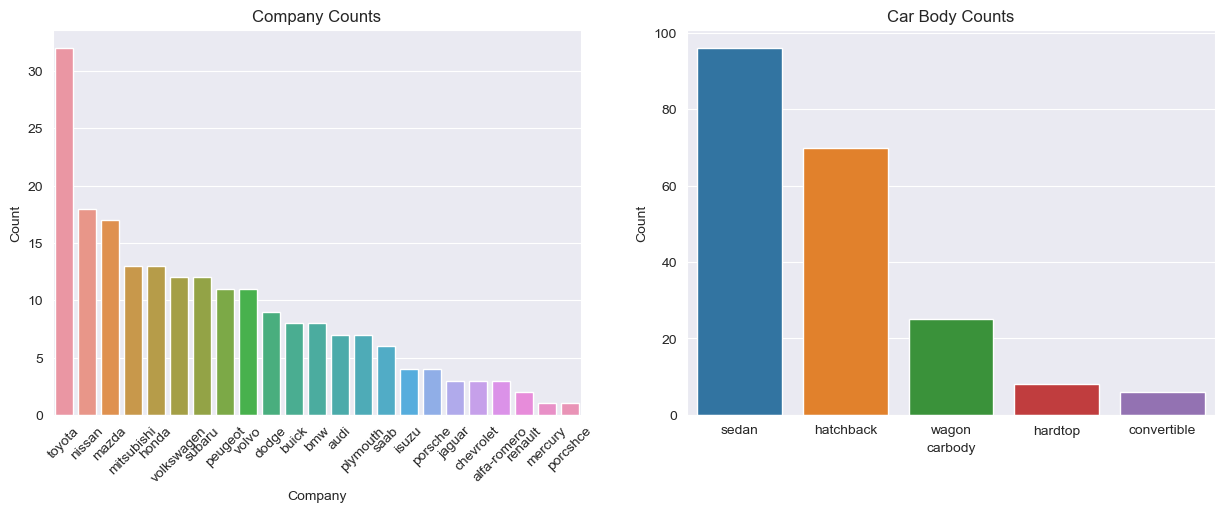

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(x='CarCompany', data=cars_df, order=cars_df['CarCompany'].value_counts().index, ax=axes[0])
axes[0].set_title('Company Counts')
axes[0].set_xlabel('Company')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

sns.countplot(x='carbody', data=cars_df, order=cars_df['carbody'].value_counts().index, ax=axes[1])
axes[1].set_title('Car Body Counts')
axes[1].set_ylabel('Count')

plt.show()

After creating these 2 plots, describe what we can conclude from them

**Type your answer here:**
The plots indicate that this dataset mostly contains cars from the toyota company, and that most of these cars have a body of sedan or hatchback.

Create the following plots

1. A plot of the unique company names on the x-axis, and that companies average price on the y-axis.
2. A plot of the unique car bodys on the x-axis and that car body's average price on the y-axis.

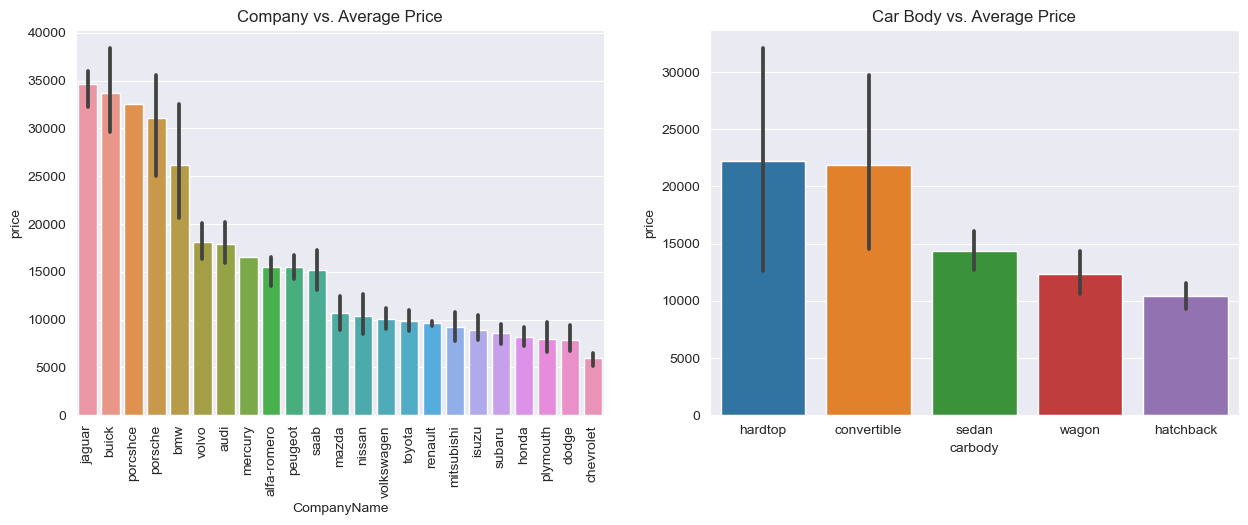

In [9]:
comp_avg_price = cars_df.groupby('CarCompany')['price'].mean().sort_values(ascending=False)
carbody_avg_price = cars_df.groupby('carbody')['price'].mean().sort_values(ascending=False)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.barplot(x = 'CarCompany', y = 'price', data=cars_df, ax=axes[0], order = comp_avg_price.index)
axes[0].set_title('Company vs. Average Price')
axes[0].set_xlabel('CompanyName')
axes[0].set_ylabel('price')
axes[0].tick_params(axis='x', rotation=90)

sns.barplot(x = 'carbody', y = 'price', data=cars_df, ax=axes[1], order = carbody_avg_price.index)
axes[1].set_title('Car Body vs. Average Price')
axes[1].set_ylabel('price')

plt.show()

After creating these 2 plots, describe what we can conclude from them.

**Type your answer here:** From the *Company vs. Average Price* plot we can conclude thet Jaguar and Buick have on average the highest prices, further, the plot indicates that the companies can be split into 3 broad groups based on their average price; Everything to the right of (and including) Mazda have on average the lowest prices, All the companies between (and including) Volvo and Saab have on average moderate prices (compared to all other companies), and all companies to the left of (and including) Porsche have the highest prices on average.

The *Car Body vs. Average Price* plot indicates that cars which have a body of hardtop and convertible are the most expensive on average compared to all the other car body types.

Create the following plots

1. A plot of the unique symboling values on the x-axis, and the value counts on the y-axis.
2. A box plot of the unique symboling values on the x-axis and price on the y-axis.

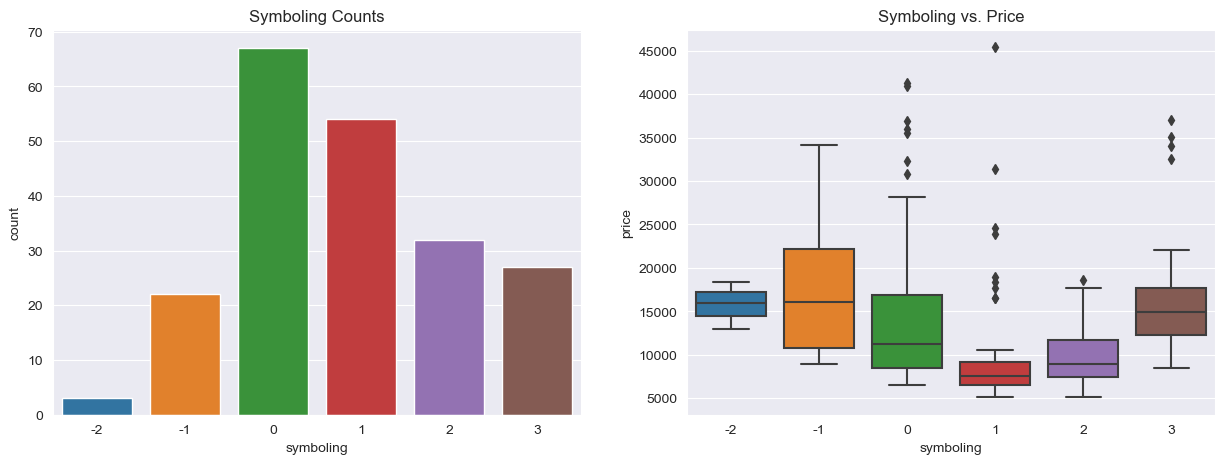

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(x='symboling', data=cars_df, order=sorted(set(cars_df['symboling'].value_counts().index)), ax=axes[0])
axes[0].set_title('Symboling Counts')
axes[0].set_xlabel('symboling')
axes[0].set_ylabel('count')

sns.boxplot(x='symboling', y='price', data=cars_df)
axes[1].set_title('Symboling vs. Price')
axes[1].set_ylabel('price')

plt.show()

After creating these 2 plots, describe what we can conclude from them.

**Type your answer here:** The plots indicate that the vast majority of cars in this dataset have a symboling of 0 or 1, the box plot indicates that symboling 0, 1, and 3 have the most outliers (symbol 2 has one outlier). It also appears that symboling 0 data may not be symmetric and may be skewed to the right.

Create the following plots

1. A plot of enginetype on the x-axis, and the value counts on the y-axis.
2. A box plot of enginetype on the x-axis and price on the y-axis.

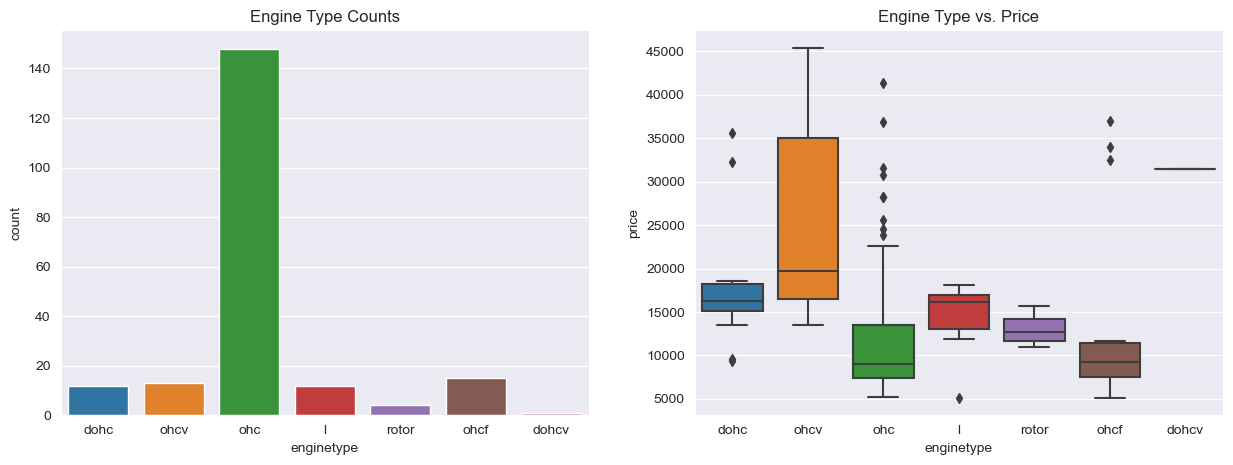

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(x='enginetype', data=cars_df, ax=axes[0])
axes[0].set_title('Engine Type Counts')
axes[0].set_xlabel('enginetype')
axes[0].set_ylabel('count')

sns.boxplot(x='enginetype', y='price', data=cars_df)
axes[1].set_title('Engine Type vs. Price')
axes[1].set_ylabel('price')

plt.show()

After creating these 2 plots, describe what we can conclude from them.

**Type your answer here:** Most cars in this dataset have the *ohc* enginetype, however the most expensieve car has an enginetype of ohcv. Further, dohc, ohc, I, and ohcf all have outliers and the data for enginetypes dohc, ohcv, and ohc is right skewed.

Create the following plots

1. A plot of cylindernumber on the x-axis, and the value counts on the y-axis.
2. A box plot of cylindernumber on the x-axis and price on the y-axis.

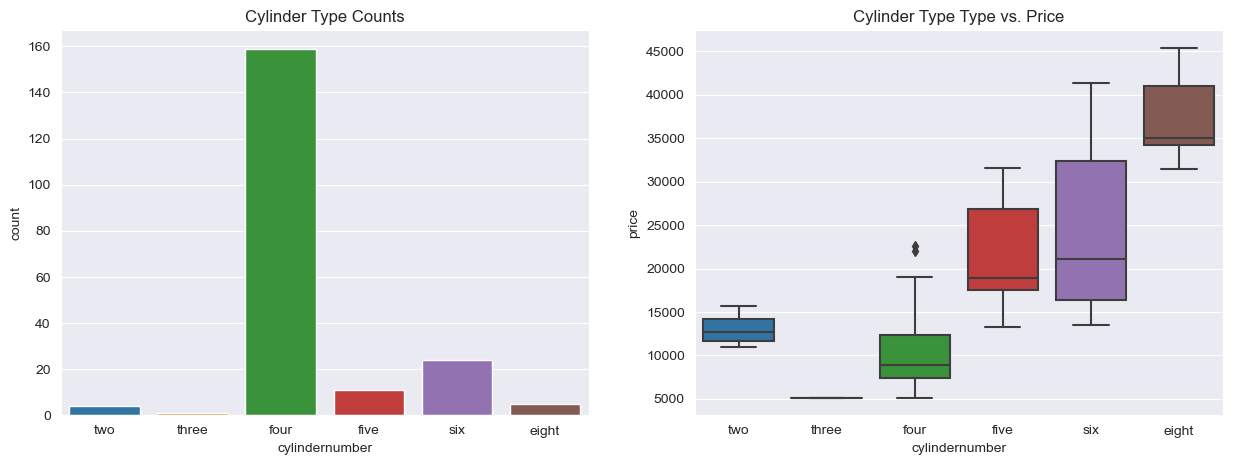

In [12]:
cylinders = ['two', 'three', 'four', 'five', 'six', 'eight']
cars_df['cylindernumber'] = pd.Categorical(cars_df['cylindernumber'], categories=cylinders)
sorted_cars_df = cars_df.sort_values('cylindernumber')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(x='cylindernumber', data=sorted_cars_df, ax=axes[0])
axes[0].set_title('Cylinder Type Counts')
axes[0].set_xlabel('cylindernumber')
axes[0].set_ylabel('count')

sns.boxplot(x='cylindernumber', y='price', data=sorted_cars_df)
axes[1].set_title('Cylinder Type Type vs. Price')
axes[1].set_ylabel('price')

plt.show()

After creating these 2 plots, describe what we can conclude from them.

**Type your answer here:** Most cars in the dataset have four cylinders, however eight cylinder cars have the highest median price. According to the box plots most of the data for this measurement is skewed right. Further the three cylinder car has the cheapest price however that is due to it only having one measurement.

Create the following plots

1. A plot of fuelsystem on the x-axis, and the value counts on the y-axis.
2. A box plot of fuelsystem on the x-axis and price on the y-axis.

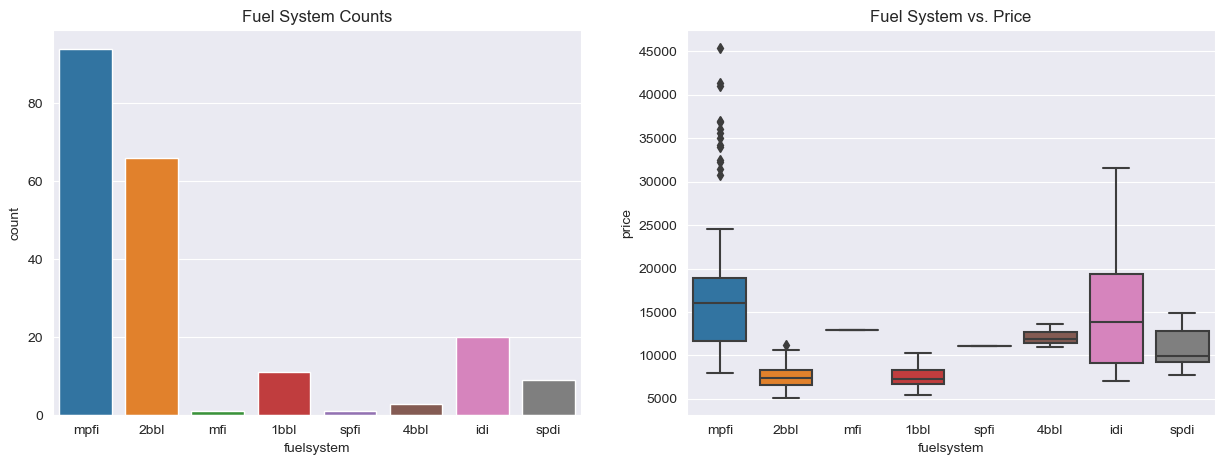

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(x='fuelsystem', data=cars_df, ax=axes[0])
axes[0].set_title('Fuel System Counts')
axes[0].set_xlabel('fuelsystem')
axes[0].set_ylabel('count')

sns.boxplot(x='fuelsystem', y='price', data=cars_df)
axes[1].set_title('Fuel System vs. Price')
axes[1].set_ylabel('price')

plt.show()

After creating these 2 plots, describe what we can conclude from them.

**Type your answer here:** The *mpfi* and *2bbl* are by far the most common fuel systems among cars in this data set. *2bbl* and *1bbl* seem to share similar price ranges, the *mpfi* fuel system also has the most outliers in its pricing data.

Create the following plots

1. A plot of drivewheel on the x-axis, and the value counts on the y-axis.
2. A box plot of drivewheel on the x-axis and price on the y-axis.

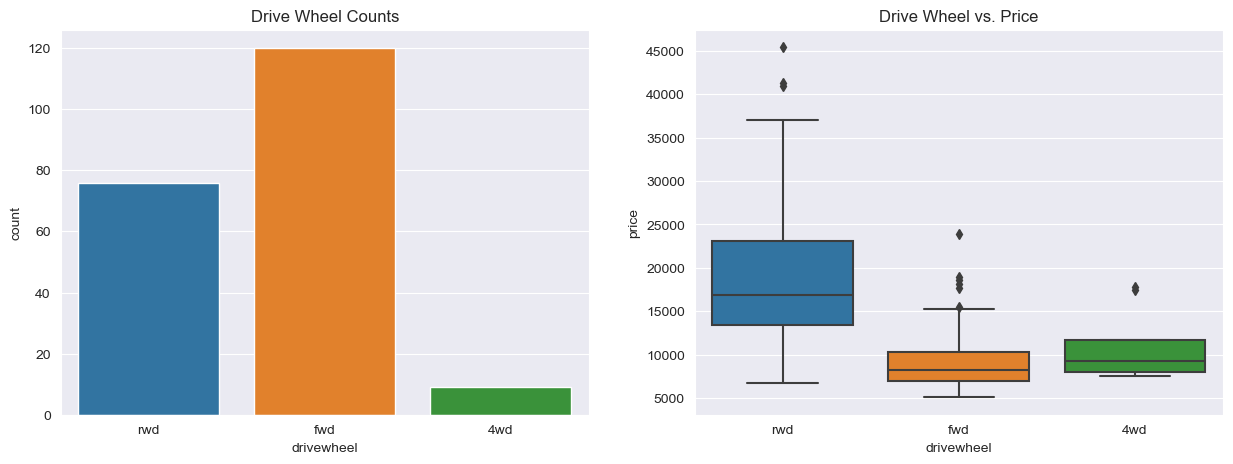

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(x='drivewheel', data=cars_df, ax=axes[0])
axes[0].set_title('Drive Wheel Counts')
axes[0].set_xlabel('drivewheel')
axes[0].set_ylabel('count')

sns.boxplot(x='drivewheel', y='price', data=cars_df)
axes[1].set_title('Drive Wheel vs. Price')
axes[1].set_ylabel('price')

plt.show()

After creating these 2 plots, describe what we can conclude from them.

**Type your answer here:** Most cars in this dataset have *fwd* drivewheels, with a significant amount also having *rwd*, not as many cars have a *4wd* drive wheel. *rwd* drive wheels seem to have the higher prices (though all of the drive wheel types contain outliers), and its data seems skewed to the right.

Create the following plots

1. A plot of enginelocation on the x-axis, and the value counts on the y-axis.
2. A box plot of enginelocation on the x-axis and price on the y-axis.

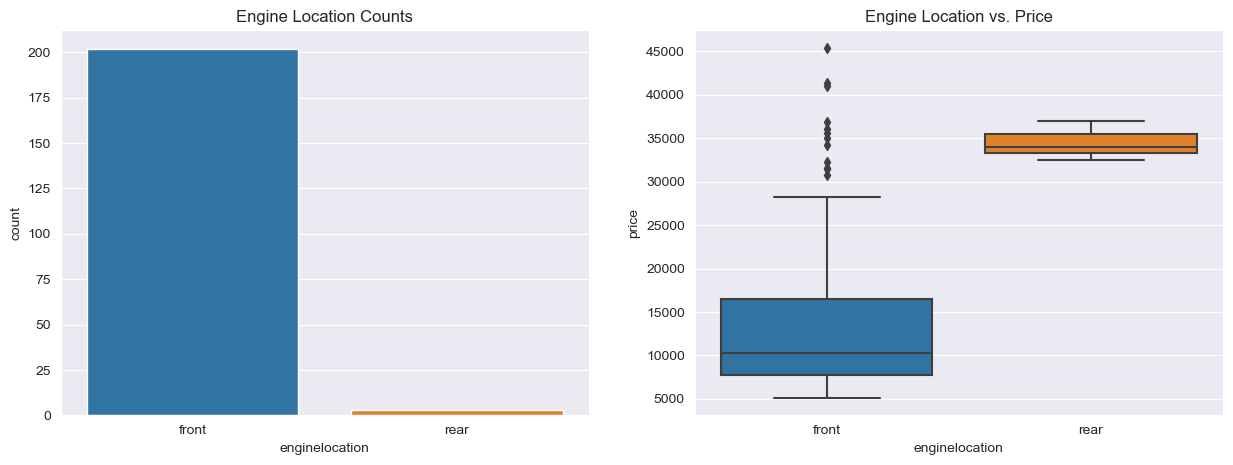

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(x='enginelocation', data=cars_df, ax=axes[0])
axes[0].set_title('Engine Location Counts')
axes[0].set_xlabel('enginelocation')
axes[0].set_ylabel('count')

sns.boxplot(x='enginelocation', y='price', data=cars_df)
axes[1].set_title('Engine Location vs. Price')
axes[1].set_ylabel('price')

plt.show()

After creating these 2 plots, describe what we can conclude from them.

**Type your answer here:** Most cars have engines located in the front with very few cars having rear engines, the box plot indicates that cars with rear engines are more expensive with it having no outliers. Conversly the max of the front engine cars are still lower than the min of rear engine carrs on the box plot, though it has many outliers.

Create the following plots

1. A plot of fueltype on the x-axis, and the value counts on the y-axis.
2. A box plot of fueltype on the x-axis and price on the y-axis.

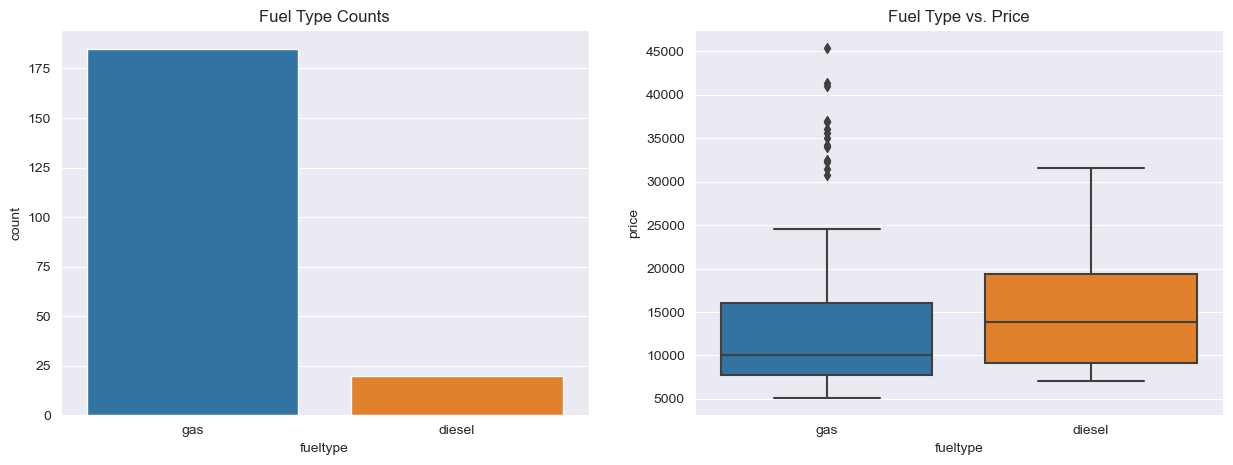

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(x='fueltype', data=cars_df, ax=axes[0])
axes[0].set_title('Fuel Type Counts')
axes[0].set_xlabel('fueltype')
axes[0].set_ylabel('count')

sns.boxplot(x='fueltype', y='price', data=cars_df)
axes[1].set_title('Fuel Type vs. Price')
axes[1].set_ylabel('price')

plt.show()

After creating these 2 plots, describe what we can conclude from them.

**Type your answer here:** Most cars in this dataset are gas cars with a smaller portion of them being diesel powered, the median price for a diesel car is higher than the median price for a gas car. Gas cars seems relatively cheap compared to diesel cars (though their lowest prices are roughly in similar regions) however gas cars have many outliers of expensive prices.

Create the following plots

1. A plot of doornumber on the x-axis, and the value counts on the y-axis.
2. A box plot of doornumber on the x-axis and price on the y-axis.

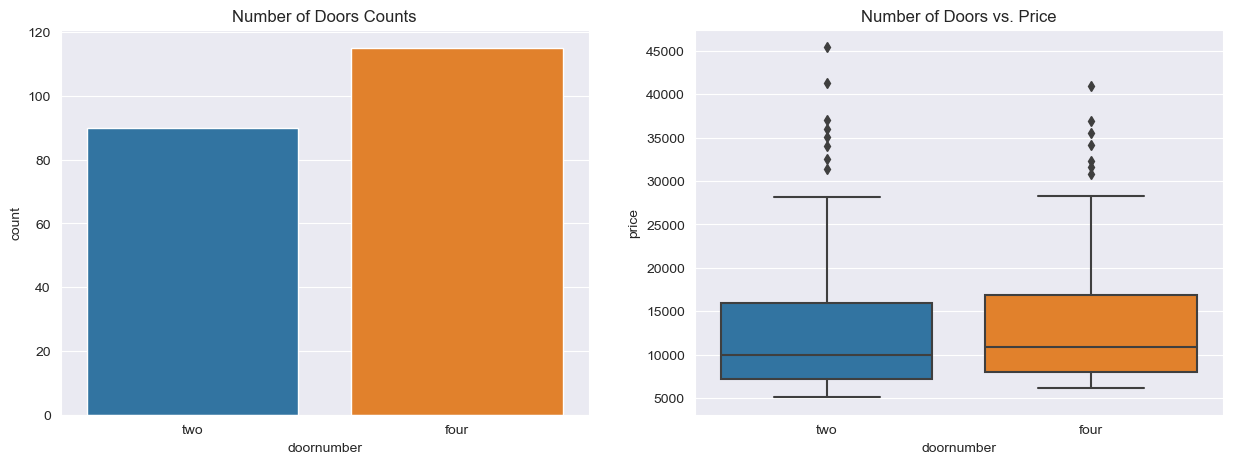

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(x='doornumber', data=cars_df, ax=axes[0])
axes[0].set_title('Number of Doors Counts')
axes[0].set_xlabel('doornumber')
axes[0].set_ylabel('count')

sns.boxplot(x='doornumber', y='price', data=cars_df)
axes[1].set_title('Number of Doors vs. Price')
axes[1].set_ylabel('price')

plt.show()

After creating these 2 plots, describe what we can conclude from them.

**Type your answer here:** Most cars have four doors, however a notable portion of cars in this dataset have two doors. Both two door and four door cars have roughly similar pricing, with the four door variant have a slightly higer median price, and both types have outliers.

Create the following plots

1. A plot of aspiration on the x-axis, and the value counts on the y-axis.
2. A box plot of aspiration on the x-axis and price on the y-axis.

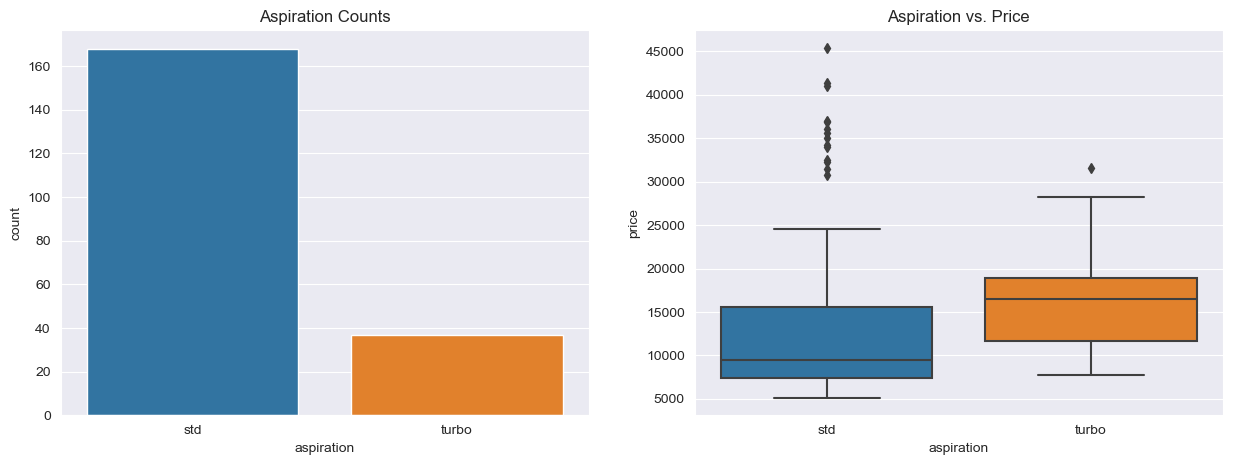

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.countplot(x='aspiration', data=cars_df, ax=axes[0])
axes[0].set_title('Aspiration Counts')
axes[0].set_xlabel('aspiration')
axes[0].set_ylabel('count')

sns.boxplot(x='aspiration', y='price', data=cars_df)
axes[1].set_title('Aspiration vs. Price')
axes[1].set_ylabel('price')

plt.show()

After creating these 2 plots, describe what we can conclude from them.

**Type your answer here:** Most cars in the dataset have standard aspiration while some have turbo, further the median price of turbo aspiration is much higher than that of the *std* aspiration. The minimum price of the turbo aspiration is roughhly by the first quartile of the *std* aspiration models, *std* aspiration also has many more outliers than the turbo aspiration.

### Part 4. Visualising Numerical Data

- price
- carlength
- carwidth
- carheight
- curbweight
- enginesize
- boreratio
- stroke
- compressionratio
- horsepower
- peakrpm
- wheelbase
- citympg
- highwaympg

Create the following plots

- A plot showing the price distribution
- A box plot of price

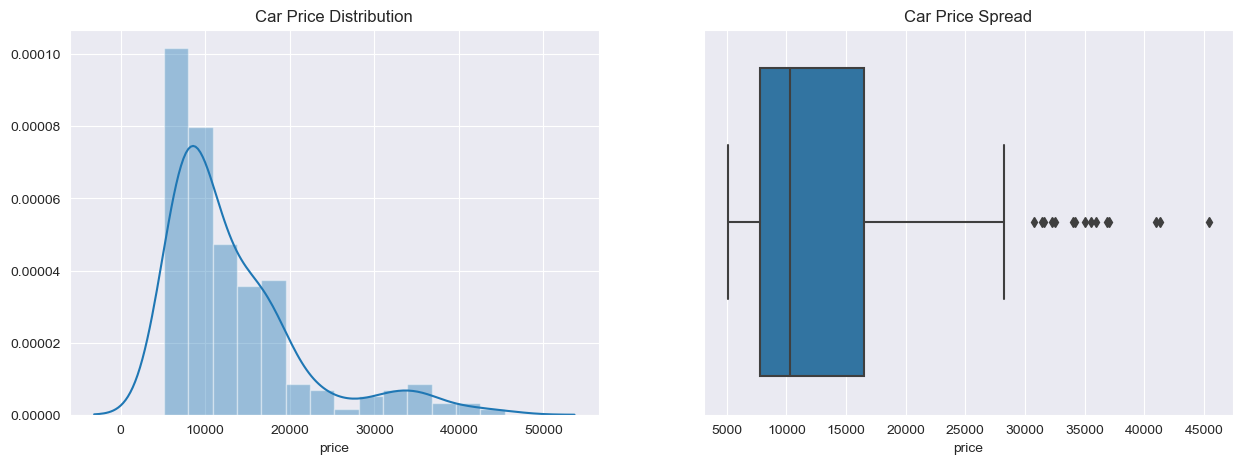

In [19]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

sns.distplot(cars_df['price'], kde=True, ax=axes[0])
axes[0].set_title('Car Price Distribution')
axes[0].set_xlabel('price')
axes[0].set_ylabel('')

sns.boxplot(x='price', data=cars_df)
axes[1].set_title('Car Price Spread')

plt.show()
warnings.filterwarnings("default", category=UserWarning)

After creating these 2 plots, describe what we can conclude from them.

**Type your answer here:** The distribution plot of price does not exhibit a bell shape and thus might not be nomrally distributed. The plots indicate that the data may be right skewed. As seen in the box plot the median price is somewhere slightly higher $10000, and the data has many outliers.

Let's try and get an idea of how the car attributes related to a car's size are related to price.

Create the following plots

1. A scatter plot of carlength vs price.
2. A scatter plot of carwidth vs price.
3. A scatter plot of carheight vs price.
4. A scatter plot of carweight vs price.

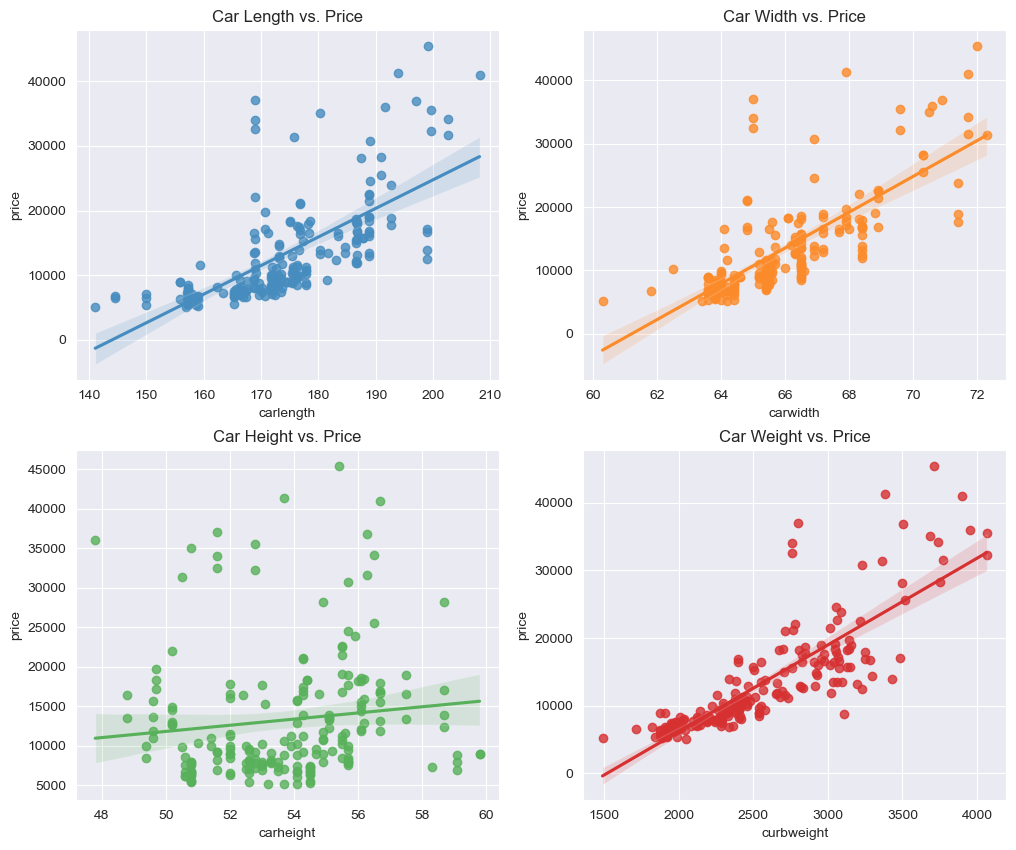

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.regplot(data=cars_df, x='carlength', y='price', ax=axes[0][0], color="#468cbf")
axes[0][0].set_title('Car Length vs. Price')

sns.regplot(data=cars_df, x='carwidth', y='price', ax=axes[0][1], color="#fc8b2a")
axes[0][1].set_title('Car Width vs. Price')

sns.regplot(data=cars_df, x='carheight', y='price', ax=axes[1][0], color="#58b15a")
axes[1][0].set_title('Car Height vs. Price')

sns.regplot(data=cars_df, x='curbweight', y='price', ax=axes[1][1], color="#d63031")
axes[1][1].set_title('Car Weight vs. Price')

plt.show()

After creating the 4 plots above, describe what we can conclude from them.

**Type your answer here:** The plots indicate a strong positive linear relationship between Car Weight and Price, there is also a positive relationship between car length and price, and car width and price. Car height seems to have a weaker relationship with price compared to all the other plotted features.

Create scatter plots of the remaining numerical variables to see their relationship with price.

Create the following plots

1. A scatter plot of enginesize vs price.
2. A scatter plot of boreratio vs price.
3. A scatter plot of stroke vs price.
4. A scatter plot of compressionratio vs price.
5. A scatter plot of horsepower vs price.
6. A scatter plot of peakrpm vs price.
7. A scatter plot of wheelbase vs price.
8. A scatter plot of citympg vs price.
9. A scatter plot of highwaympg vs price.

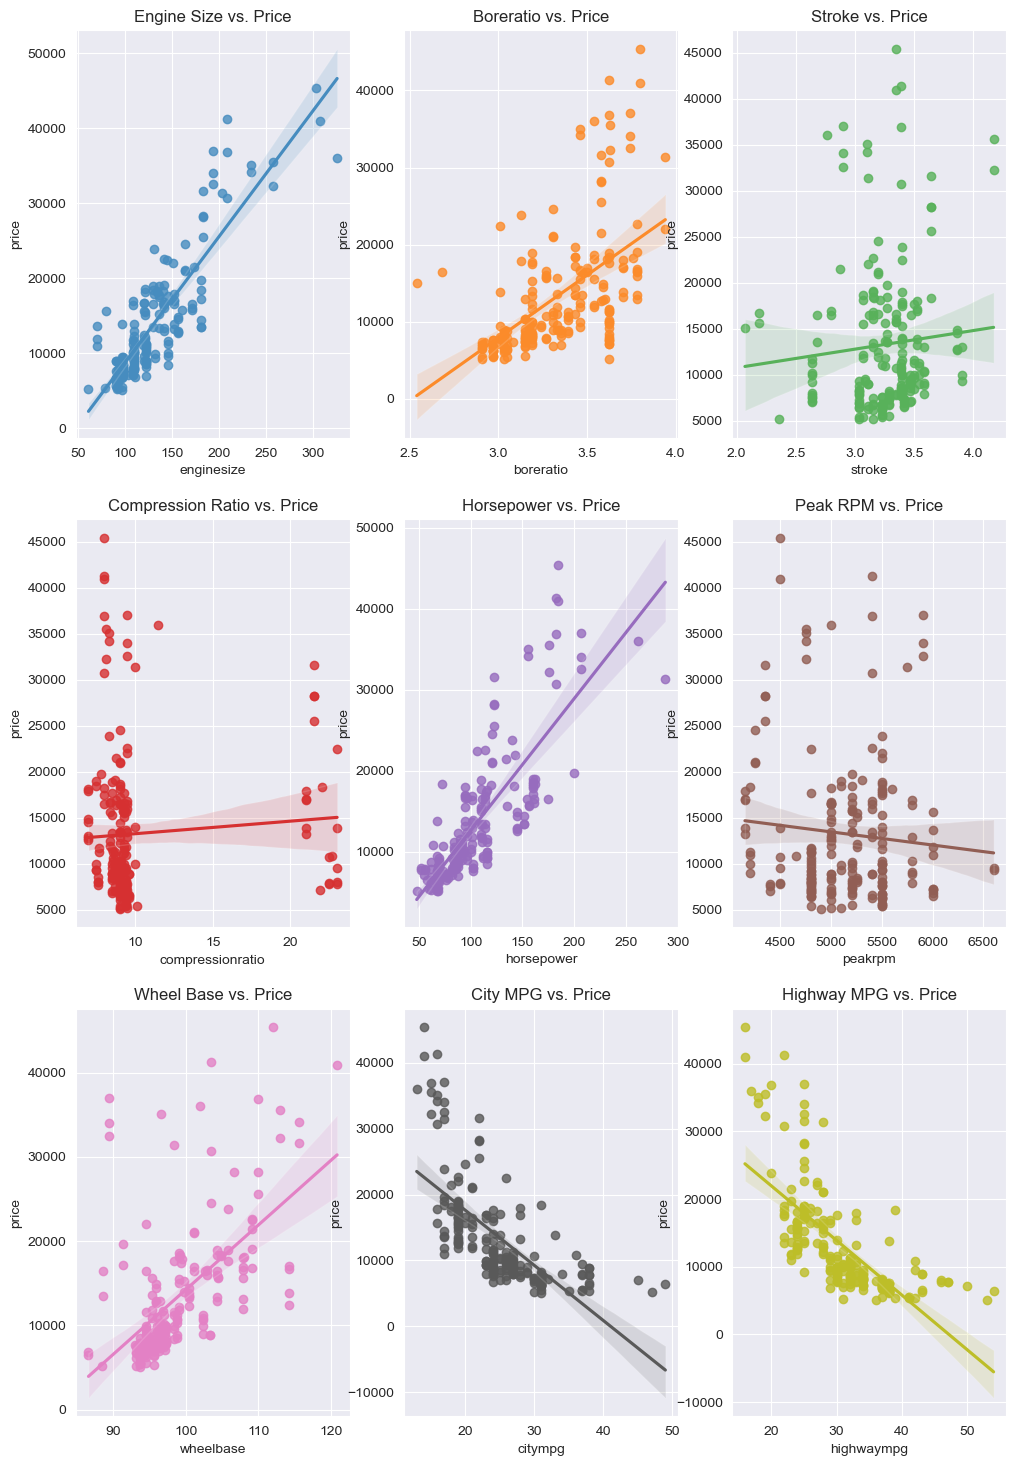

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 18))

sns.regplot(data=cars_df, x='enginesize', y='price', ax=axes[0][0], color="#468cbf")
axes[0][0].set_title('Engine Size vs. Price')

sns.regplot(data=cars_df, x='boreratio', y='price', ax=axes[0][1], color="#fc8b2a")
axes[0][1].set_title('Boreratio vs. Price')

sns.regplot(data=cars_df, x='stroke', y='price', ax=axes[0][2], color="#58b15a")
axes[0][2].set_title('Stroke vs. Price')

sns.regplot(data=cars_df, x='compressionratio', y='price', ax=axes[1][0], color="#d63031")
axes[1][0].set_title('Compression Ratio vs. Price')

sns.regplot(data=cars_df, x='horsepower', y='price', ax=axes[1][1], color="#976cbe")
axes[1][1].set_title('Horsepower vs. Price')

sns.regplot(data=cars_df, x='peakrpm', y='price', ax=axes[1][2], color="#915e54")
axes[1][2].set_title('Peak RPM vs. Price')

sns.regplot(data=cars_df, x='wheelbase', y='price', ax=axes[2][0], color="#e381c5")
axes[2][0].set_title('Wheel Base vs. Price')

sns.regplot(data=cars_df, x='citympg', y='price', ax=axes[2][1], color=".35")
axes[2][1].set_title('City MPG vs. Price')

sns.regplot(data=cars_df, x='highwaympg', y='price', ax=axes[2][2], color="#bdbe28")
axes[2][2].set_title('Highway MPG vs. Price')

plt.show()

After creating the plots above, describe what we can conclude from them.

**Type your answer here:**

Create a heatmap or correlation matrix to inspect the correlations in our dataset.

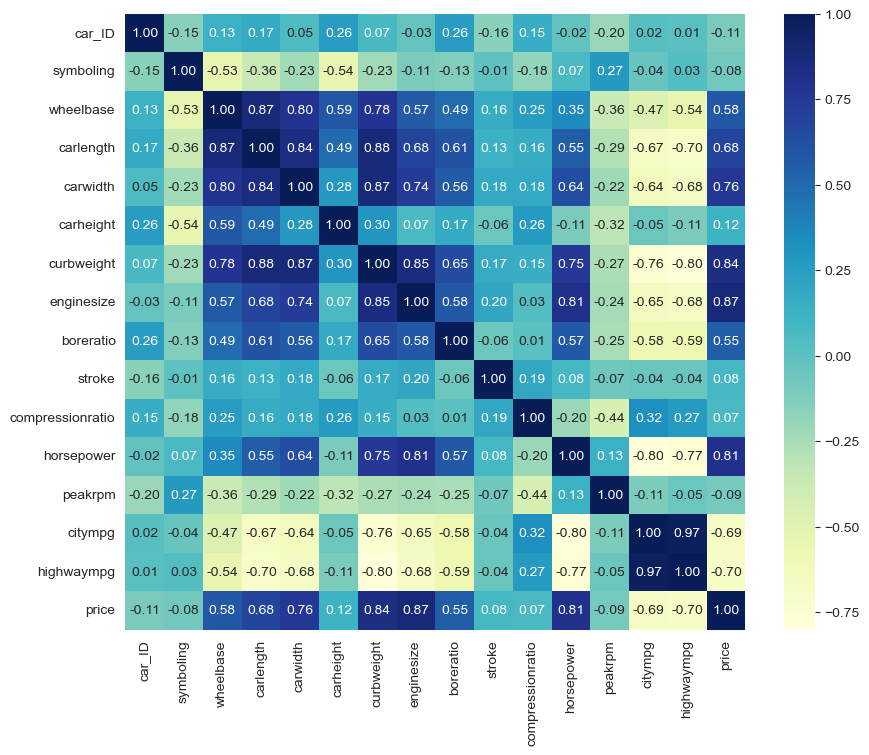

In [45]:
numeric_columns = cars_df.select_dtypes(include=['int', 'float']).columns
numeric_df = cars_df[numeric_columns]

plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='YlGnBu', fmt='.2f')

plt.show()

After creating the plot above, what can you conclude? Are there any features you can combine to form a new one? If so, try it out and see how it affects your final results in the end.

**Type your answer here:** highwaympg & citympg can be combined

For example, citympg and highwaympg can be combined into a single feature. Create a new column called 'fuel_economy' that's a combination of the 2.

In [39]:
#TODO: code

After visual analysis, which variables do you believe to be significant when predicting price, and why?

**Type your answer here:**